<a href="https://colab.research.google.com/github/harika373/harika767299/blob/main/Credit-Card-Fraud-Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid',palette='cividis')

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Creating the dataframe
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
df = pd.read_csv(file_path)

In [3]:
# dataset values
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# dataset statistical summary
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# null values checking
print('Total of Null Values:', df.isnull().sum().max())

Total of Null Values: 0


Class
0    284315
1       492
Name: count, dtype: int64


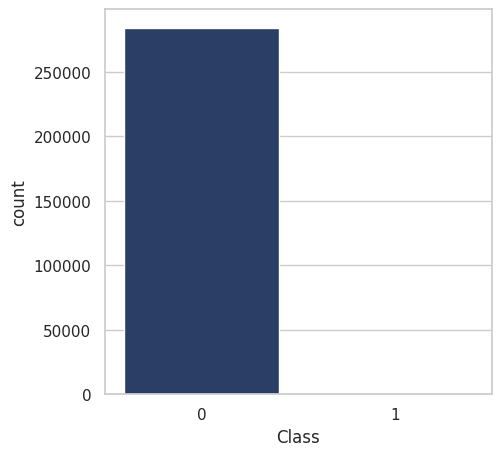

In [6]:
# checking the balance between legal and illegal transactions
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='Class',data=df);
print(pd.Series(df.Class).value_counts())
plt.show()

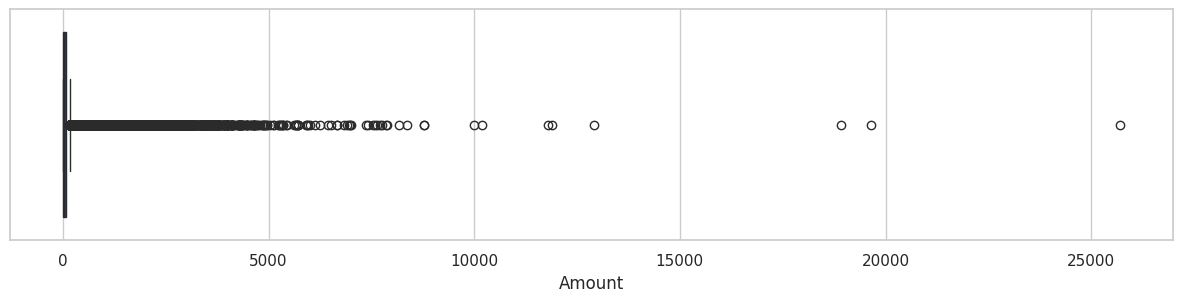

In [7]:
# checking outliers in `Amount` values
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(x='Amount', data=df)
plt.show()

In [8]:
# checking outlier values
q1_amount = df.Amount.quantile(.25)
q3_amount = df.Amount.quantile(.75)
IQR_amount = q3_amount - q1_amount
print('IQR: ', IQR_amount)

# defining limits
sup_amount = q3_amount + 1.5 * IQR_amount
inf_amount = q1_amount - 1.5 * IQR_amount

print('Upper limit: ', sup_amount)
print('Lower limit: ', inf_amount)

IQR:  71.565
Upper limit:  184.5125
Lower limit:  -101.7475


In [9]:
#cleaning the outliers in `Amount` values
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.Amount>184.49].index, axis=0, inplace=True)

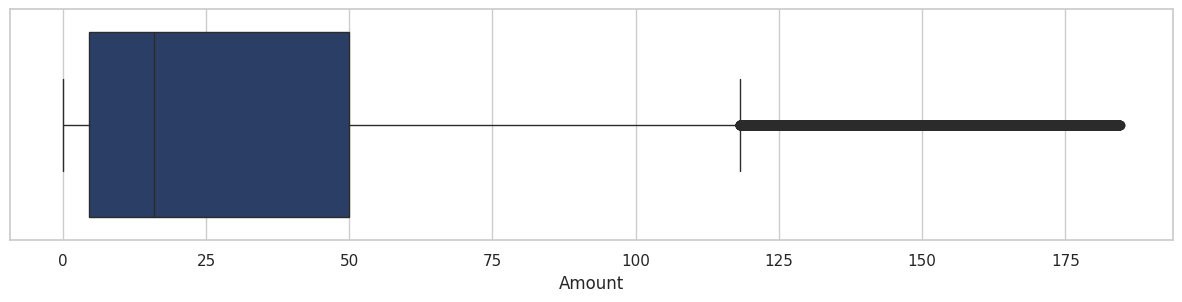

In [10]:
# new boxplot for `Amount` values
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(x='Amount', data=df_clean)
plt.show()

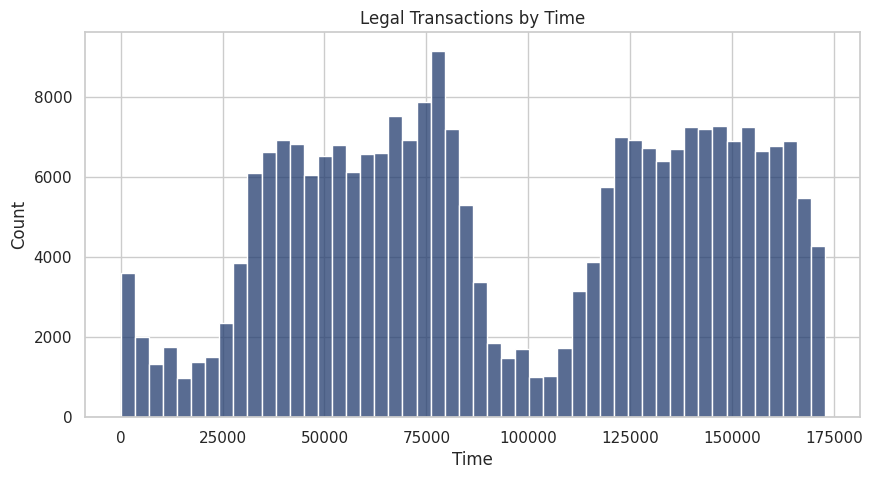

In [11]:
# legal transactions by time
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df_clean.Time[df_clean.Class==0]), bins=50);
ax.set_title('Legal Transactions by Time')
plt.show()

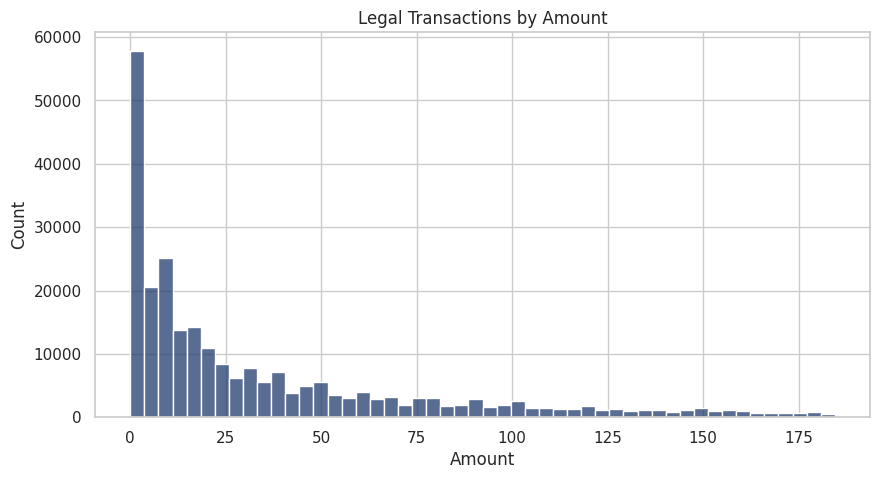

In [12]:
# legal transactions by amount
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df_clean.Amount[df_clean.Class==0]), bins=50)
ax.set_title('Legal Transactions by Amount')
plt.show()

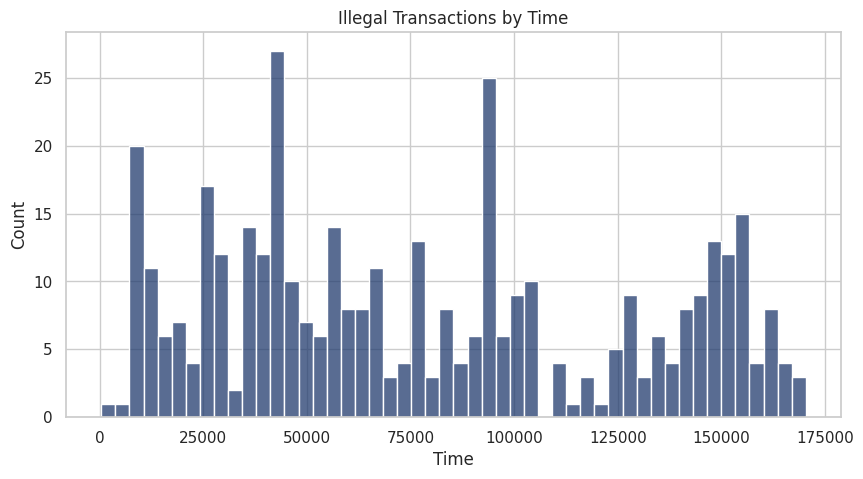

In [13]:
# illegal transactions by time
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df_clean.Time[df_clean.Class==1]), bins=50)
ax.set_title('Illegal Transactions by Time')
plt.show()

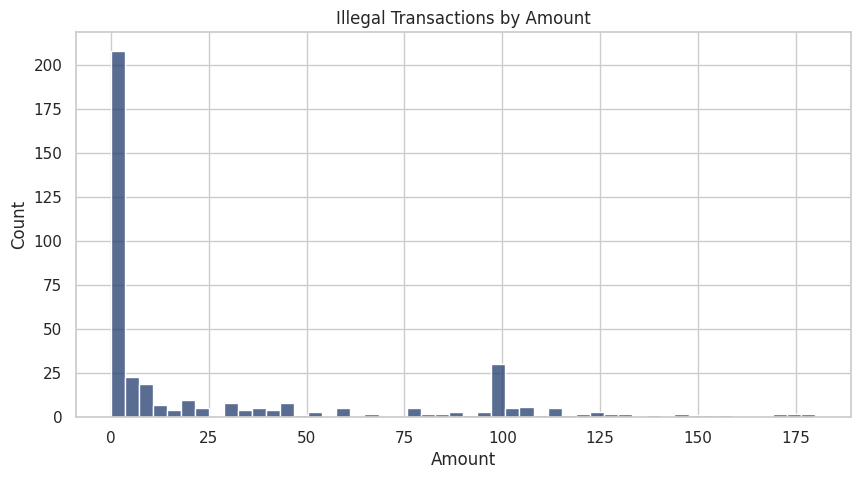

In [14]:
# illegal transactions by amount
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x=(df_clean.Amount[df_clean.Class==1]), bins=50)
ax.set_title('Illegal Transactions by Amount')
plt.show()

In [16]:
# importing scikit-learn modules

!pip install -q scikit-plot
# import scikitplot as skplt # Removed scikit-plot import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler

In [17]:
# creating a copy of the original dataset
df_new = df_clean.copy()

# standardize data
scaler = StandardScaler()
df_new['Amount'] = scaler.fit_transform(df_new.Amount.values.reshape(-1, 1))
df_new['Time'] = scaler.fit_transform(df_new.Time.values.reshape(-1, 1))

# check the standardized data
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.995712,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,2.719341,0
1,-1.995712,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.765588,0
3,-1.995691,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,2.099819,0
4,-1.995670,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.830653,0
5,-1.995670,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.742344,0


In [18]:
# train and test data
X = df_new.drop('Class', axis=1)
y = df_new['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)

Class
0    301
1    301
Name: count, dtype: int64


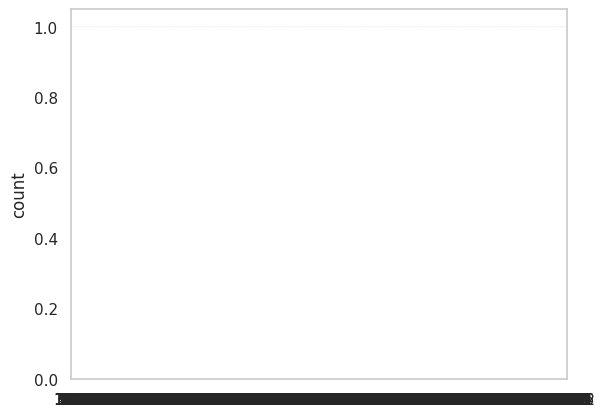

In [20]:
# instantiating the random undersampler
rus = RandomUnderSampler()

# resampling X, y
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# new class distribution
print(pd.Series(y_rus).value_counts())
sns.countplot(y_rus);

In [22]:
# setup the machine learning model:
np.random.seed(2)
model = LogisticRegression(C=0.01)
model.fit(X_rus, y_rus, sample_weight=True)

LogisticRegression(C=0.01)

In [23]:
# model predictions:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

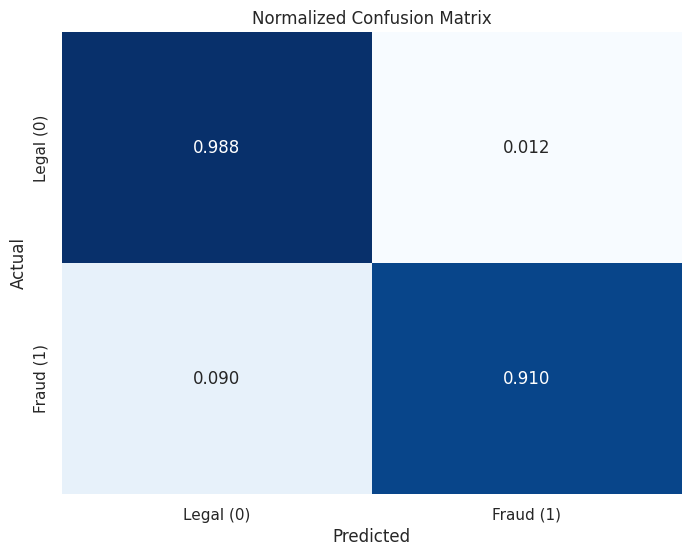

Classification Report:
               precision    recall  f1-score   support

           0      1.000     0.988     0.994     63123
           1      0.107     0.910     0.192       100

    accuracy                          0.988     63223
   macro avg      0.554     0.949     0.593     63223
weighted avg      0.998     0.988     0.993     63223



In [25]:
# classification report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".3f", cmap='Blues', cbar=False,
            xticklabels=['Legal (0)', 'Fraud (1)'],
            yticklabels=['Legal (0)', 'Fraud (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))